# ✈️ Flight Delay Analytics - Newark Liberty International Airport (EWR)
**NAME:** Akshata Kadwad
**Program:** MBA in Business Analytics

### 📘 Objective
This project analyzes flight delays at Newark Liberty International Airport (EWR) using U.S. Bureau of Transportation Statistics data.  
The goal is to identify delay patterns, primary causes and airline performance to provide insights for improving on-time operations.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔁 In this section, the dataset is loaded, inspected and cleaned.
Missing or inconsistent values are handled and data types are verified to prepare the dataset for visualization and analysis.

In [4]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df.head

#checking for missing value
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

## 📊 Exploratory Data Analysis
In this section, descriptive statistics and exploratory data analysis are conducted to understand the distribution, variability and relationships among key variables.


In [6]:
df.describe

df.columns

df['arr_delay'].describe()

count       664.000000
mean      16968.751506
std       30465.088679
min           0.000000
25%        1642.000000
50%        6734.000000
75%       18158.000000
max      260257.000000
Name: arr_delay, dtype: float64

In [27]:
df['carrier']

0      YX
1      G7
2      MQ
3      NK
4      UA
       ..
659    MQ
660    NK
661    OH
662    UA
663    YX
Name: carrier, Length: 664, dtype: object

In [20]:
average_delay = df['arr_delay'].mean()
average_delay

16968.751506024095

In [23]:
cause_of_delay = df.groupby('carrier')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']].mean()
print(cause_of_delay)


         carrier_delay  weather_delay     nas_delay  security_delay
carrier                                                            
9E          475.600000     100.090909    961.800000        0.000000
AA         3526.709091     751.054545   3881.781818       49.836364
AS          817.309091     213.254545   2326.036364        7.836364
B6         5719.563636     465.509091   4478.309091       48.236364
C5         1165.900000     313.000000    912.400000        1.200000
DL         3062.963636     349.709091   3724.236364        4.836364
F9         1025.821429      94.500000    989.892857        0.000000
G4          229.600000      43.290909    187.709091        4.418182
G7         4122.472727    1644.054545   7995.727273        2.672727
MQ          141.589744      77.769231    329.589744        1.743590
NK         3019.545455     646.800000   7795.127273       88.200000
OH           17.666667      27.333333     61.666667        0.000000
OO          640.823529     181.852941    110.558

In this section, average flight delays are analyzed over time to identify monthly and yearly trends that may indicate seasonal effects or operational changes.

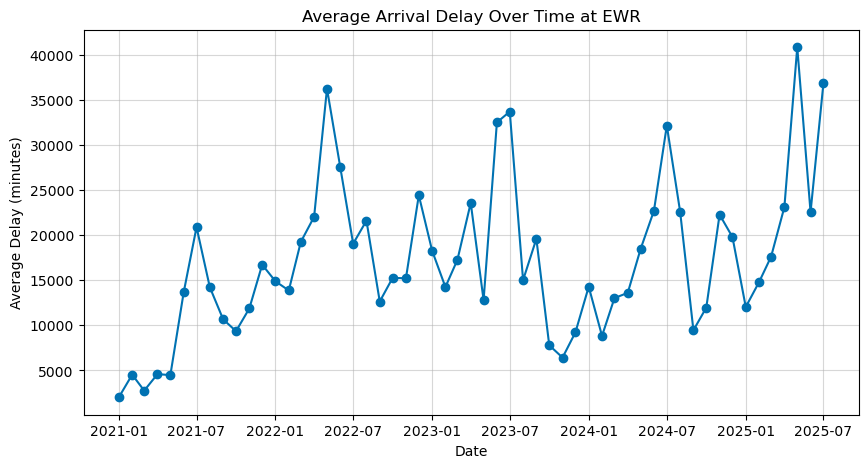

In [7]:
# Group by year and month
trend = df.groupby(['year', 'month'])['arr_delay'].mean().reset_index()
trend['date'] = pd.to_datetime(trend['year'].astype(str) + '-' + trend['month'].astype(str))

plt.figure(figsize=(10,5))
plt.plot(trend['date'], trend['arr_delay'], marker='o', color='#0072B2')
plt.title("Average Arrival Delay Over Time at EWR")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")
plt.grid(alpha=0.5)
plt.show()


### 🛫 Average Arrival Delay Trend at EWR (2021–2025)

**Insights:**
- Delays show **seasonal peaks**, especially between **July and August**, indicating high travel demand and congestion in summer.
- There are noticeable **spikes in mid-2022 and mid-2025**, suggesting significant disruption periods (possibly weather, staffing, or operational bottlenecks).
- Overall delay levels **increase gradually over the years**, indicating a growing strain on airport/airspace capacity.


## ⚙️ Delay Causes Breakdown
In this section, total delay minutes are aggregated by cause to determine which operational factors contribute most to overall delays.  
This helps identify where efficiency improvements would have the strongest impact.


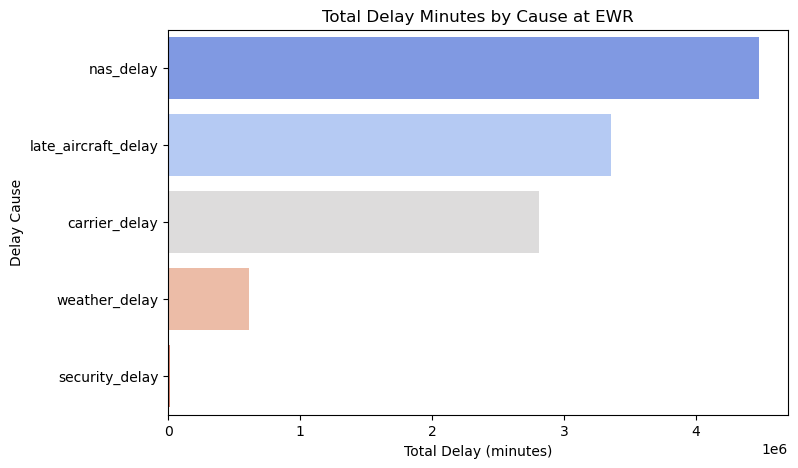

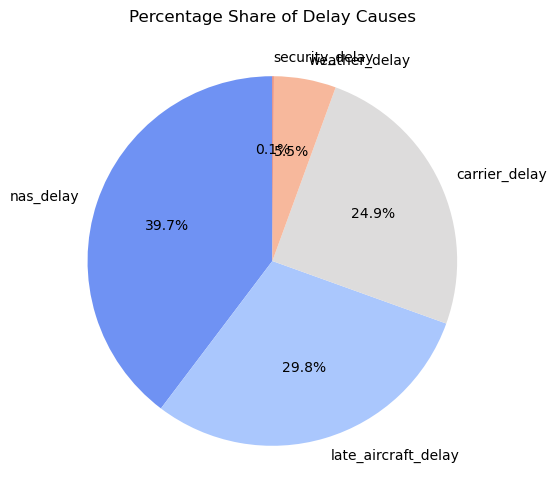

In [8]:
delay_causes = df[['carrier_delay','weather_delay','nas_delay','late_aircraft_delay','security_delay']].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=delay_causes.values, y=delay_causes.index, palette='coolwarm')
plt.title("Total Delay Minutes by Cause at EWR")
plt.xlabel("Total Delay (minutes)")
plt.ylabel("Delay Cause")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(delay_causes.values, labels=delay_causes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", 5))
plt.title("Percentage Share of Delay Causes")
plt.show()


### Total Delay Minutes by Cause at EWR

**Insight:**  
Late aircraft and NAS delays contribute the **largest share** of total delay minutes, indicating **network congestion and turnaround inefficiencies** as dominant operational issues.


## 🔥 Full Variable Correlation Heatmap
In this section a correlation heatmap is generated to compare how all numeric variables in the dataset relate to each other.  
This helps identify which factors move together and which have minimal relationship.  
Higher positive correlation indicates that variables increase together, while negative correlation suggests an inverse relationship.

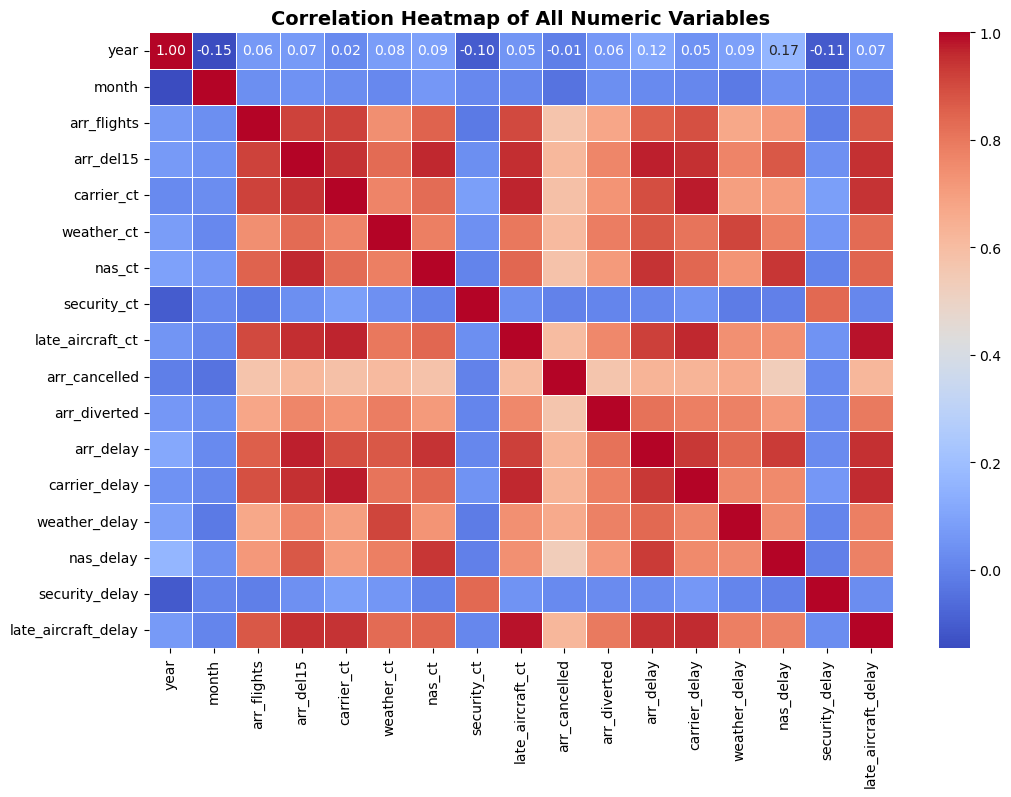

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of All Numeric Variables", fontsize=14, weight='bold')
plt.show()

### Correlation Heatmap of All Numeric Variables

**Insights:**

The heatmap shows that NAS delays and Late Aircraft delays are strongly correlated, meaning delays in the air traffic system often lead to aircraft arriving late and causing further delays. Weather delays show low correlation, indicating they occur independently and are not the main driver of overall delays

## 🏁 Overall Insights Summary

Based on the visualizations and analysis, delays at Newark Liberty International Airport (EWR) are driven primarily by **operational and network-related factors**, not weather. The correlation and cause breakdown show that **Late Aircraft** and **NAS (Air Traffic / Congestion)** delays are the largest contributors to total delay minutes. This indicates that when flights arrive late the delay often cascades into subsequent flights.

Seasonal analysis shows **higher delays during summer months**, aligning with peak travel demand and congested airspace conditions. Airline comparisons reveal that some carriers consistently experience higher delay totals, suggesting differences in **scheduling efficiency, turnaround time, and resource planning**.

Overall, improving **aircraft turnaround processes**, **gate scheduling** and **traffic flow coordination** has a greater potential impact on reducing delays than weather-related interventions.
